## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math 
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore")


np.random.seed(21091982)

## Load Data

### The data we're going to use is iris. Since we have three classes in iris data, we will make the binary class Iris based on Setosa vs otherswe.

In [2]:
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns={'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'})
iris_df['species']=iris.target 
iris_df

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris_df['species'] = iris_df['species'].apply(lambda x: 1 if x == 0 else 0)
iris_df

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [4]:
iris_df

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### Split the data to training and testing data:

In [5]:
test = iris_df.sample(frac=0.2)
test.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species
18,5.7,3.8,1.7,0.3,1
148,6.2,3.4,5.4,2.3,0
101,5.8,2.7,5.1,1.9,0
14,5.8,4.0,1.2,0.2,1
67,5.8,2.7,4.1,1.0,0


In [6]:
train_mask = pd.Series(True, index=iris_df.index)
train_mask[test.index] = False

In [7]:
train = iris_df[train_mask]
train.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
X_train=train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y_train=train['species']
print("X_train : " + str(X_train.shape))
print("y_train : " + str(y_train.shape))

X_train : (120, 4)
y_train : (120,)


In [9]:
X_test=test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
y_test=test['species']
print("X_test : " + str(X_test.shape))
print("y_test : " + str(y_test.shape))

X_test : (30, 4)
y_test : (30,)


In [10]:
#iris_df=iris_df.loc[(iris_df['species'] != 2)]
Ind_vars=iris_df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]

### Standardization of features

In [11]:
sc = StandardScaler()
sc.fit(X_train)
X_train_standard = pd.DataFrame(sc.transform(X_train),columns={'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'})
X_test_standard = pd.DataFrame(sc.transform(X_test),columns={'Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'})

In [12]:
X_train_standard.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length
0,-1.329870,-0.869921,-1.322405,1.063621
1,-1.329870,-1.102417,-1.322405,-0.111651
2,-1.385708,-1.334913,-1.322405,0.358458
3,-1.274032,-1.451161,-1.322405,0.123404
4,-1.329870,-0.986169,-1.322405,1.298675


In [13]:
X_test_standard.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length
0,-1.162356,-0.172434,-1.192332,1.768784
1,0.903641,0.408805,1.409120,0.828566
2,0.736128,-0.056186,0.888829,-0.816814
3,-1.441545,-0.056186,-1.322405,2.238892
4,0.177750,-0.056186,-0.281824,-0.816814


In [14]:
# iris_df_standard['species']=iris_df['species']
# iris_df_standard.head()

In [15]:
X_train.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,120.000000,120.000000,120.000000,120.000000
mean,3.781667,5.848333,1.216667,3.047500
std,1.798411,0.863838,0.772025,0.427217
min,1.000000,4.300000,0.100000,2.200000
25%,1.500000,5.100000,0.300000,2.800000
50%,4.300000,5.800000,1.300000,3.000000
75%,5.100000,6.400000,1.800000,3.300000
max,6.900000,7.900000,2.500000,4.400000


In [16]:
X_train_standard.describe()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.757853e-16,-1.130924e-15,-4.940492e-16,-1.811976e-15
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.553221e+00,-1.799904e+00,-1.452477e+00,-1.992085e+00
25%,-1.274032e+00,-8.699215e-01,-1.192332e+00,-5.817594e-01
50%,2.894258e-01,-5.618646e-02,1.083938e-01,-1.116508e-01
75%,7.361281e-01,6.413007e-01,7.587569e-01,5.935121e-01
max,1.741208e+00,2.385019e+00,1.669265e+00,3.179109e+00


### Definition of required functions including Sigmoid, log-likelihood, log-likelihood derivative,  logistic regression with norm2 regularization, and gradient ascent for maximization of log-likelihood function

In [17]:
def sigmoid(score):
    return (1 / (1 + np.exp(-score)))

def predict_probability(features, weights):
    score = np.dot(features, weights)
    return sigmoid(score)

In [18]:
def compute_log_likelihood(features, label, weights):
    indicator = (label==+1)
    scores    = np.dot(features, weights)
    ll        = np.sum((np.transpose(np.array([indicator]))-1)*scores - np.log(1. + np.exp(-scores)))
    return ll

In [19]:
def feature_derivative(errors, feature):
    derivative = np.dot(np.transpose(errors), feature)
    return derivative

In [20]:
def l2_feature_derivative(errors, feature, weight, l2_penalty, feature_is_constant):
    derivative = np.dot(np.transpose(errors), feature)
  
    if not feature_is_constant:
        derivative -= 2 * l2_penalty * weight

    return derivative

In [21]:
# log-likelihood computation with L2 regularization
def l2_compute_log_likelihood(features, labels, weights, l2_penalty):
    indicator = (labels==+1)
    scores    = np.dot(features, weights)
    ll        = np.sum((np.transpose(np.array([indicator]))-1)*scores - np.log(1. + np.exp(-scores))) - (l2_penalty * np.sum(weights[1:]**2))
    return ll

In [22]:
# logistic regression with L2 regularization with gradient ascent
def l2_logistic_regression(features, labels, lr, max_itr, l2_penalty):
    

  # add bias (intercept) with features matrix
    bias      = np.ones((features.shape[0], 1))
    features  = np.hstack((bias, features))

  # initialize the weight coefficients
    weights = np.zeros((features.shape[1], 1))

    logs = []

  # loop over max_itr times
    for epoch in range(max_itr):
        # predict probability for each row in the dataset
        predictions = predict_probability(features, weights)

        # calculate the indicator value
        indicators = (labels==+1)

        # calculate the errors
        errors = np.transpose(np.array([indicators])) - predictions
        # loop over each weight coefficient
        for j in range(len(weights)):
            isIntercept = (j==0)
            # calculate the derivative of jth weight cofficient for gradient ascent
            derivative = l2_feature_derivative(errors, features[:,j], weights[j], l2_penalty, isIntercept)
            #update based on gradient ascent
            weights[j] += lr * derivative

        # compute the log-likelihood
        ll = l2_compute_log_likelihood(features, labels, weights, l2_penalty)
        logs.append(ll)

    x = np.linspace(0, len(logs), len(logs))
    fig = plt.figure()
    plt.figure(figsize=(18,12))
    C=1/l2_penalty

    plt.plot(x, logs)
    plt.title('Training the classifier (with L2) and C=%f' %C,fontsize=24)
    plt.xlabel('maximum iteration',fontsize=20)
    plt.ylabel('Log-likelihood',fontsize=20)
    fig.savefig('train_with_l2.jpg')

    plt.show()

    return weights

### The logistic regression will be run with learning rate 0.01, maximum iteration 100, and lambda 0.1 (C=10)

<Figure size 432x288 with 0 Axes>

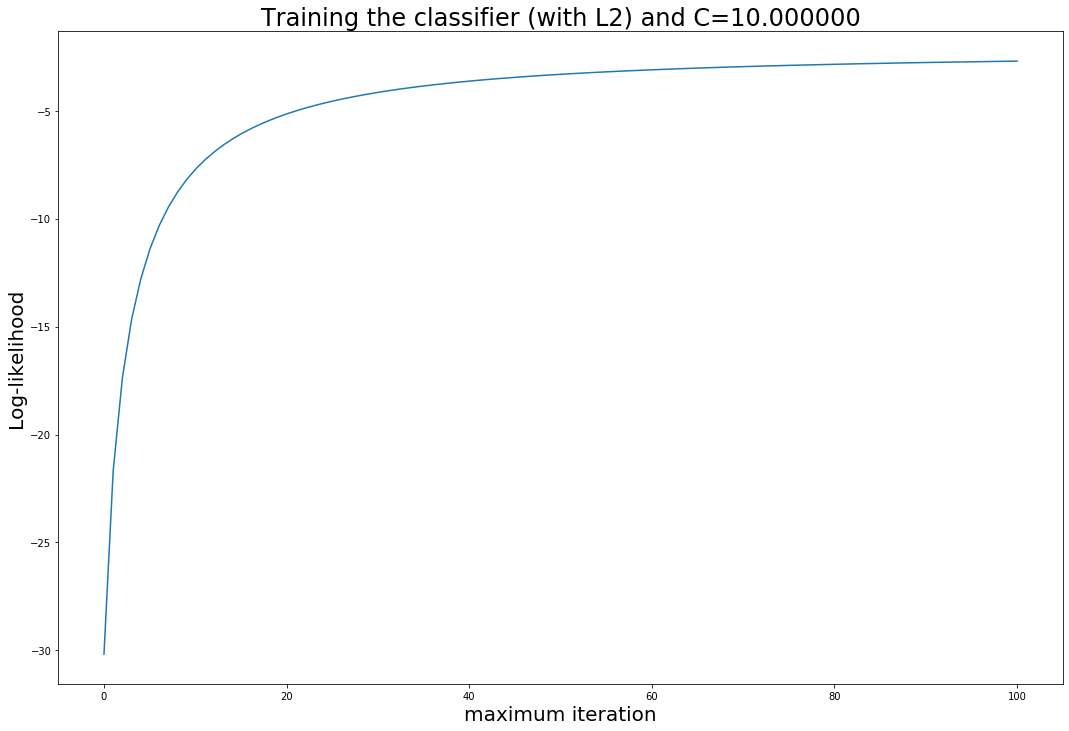

In [23]:
learning_rate = 1e-2
max_itr        = 100
l2_penalty    = 0.1
learned_weights = l2_logistic_regression(X_train_standard, y_train, learning_rate, max_itr, l2_penalty)

### The logistic regression will be run with learning rate 0.01, maximum iteration 100, and lambda 1 (C=1)

<Figure size 432x288 with 0 Axes>

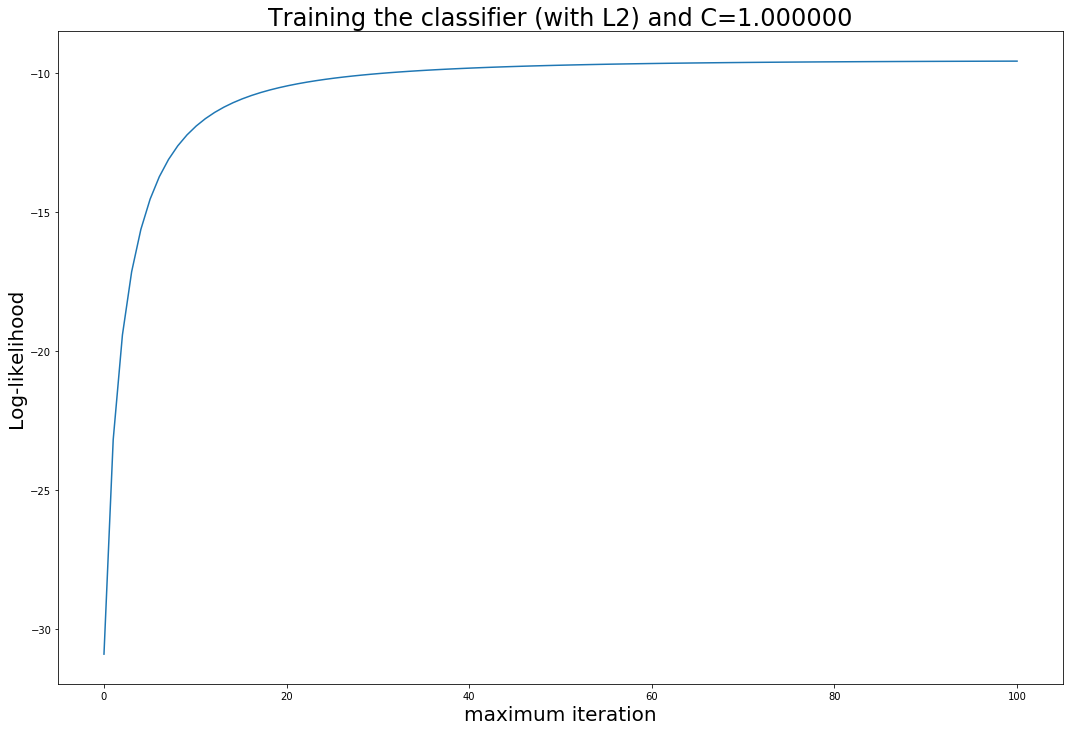

In [24]:
learning_rate = 1e-2
max_itr        = 100
l2_penalty    = 1
learned_weights = l2_logistic_regression(X_train_standard, y_train, learning_rate, max_itr, l2_penalty)

### The logistic regression will be run with learning rate 0.01, maximum iteration 100, and lambda 10 (C=0.1)

<Figure size 432x288 with 0 Axes>

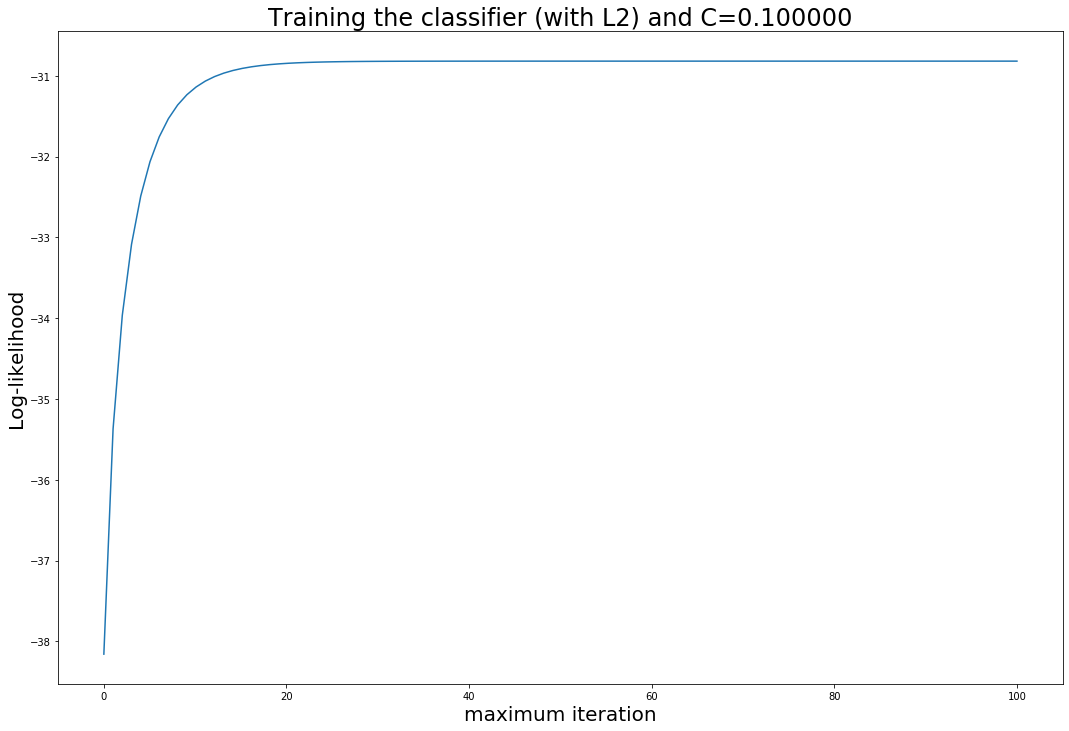

In [25]:
learning_rate = 1e-2
max_itr        = 100
l2_penalty    = 10
learned_weights = l2_logistic_regression(X_train_standard, y_train, learning_rate, max_itr, l2_penalty)

<Figure size 432x288 with 0 Axes>

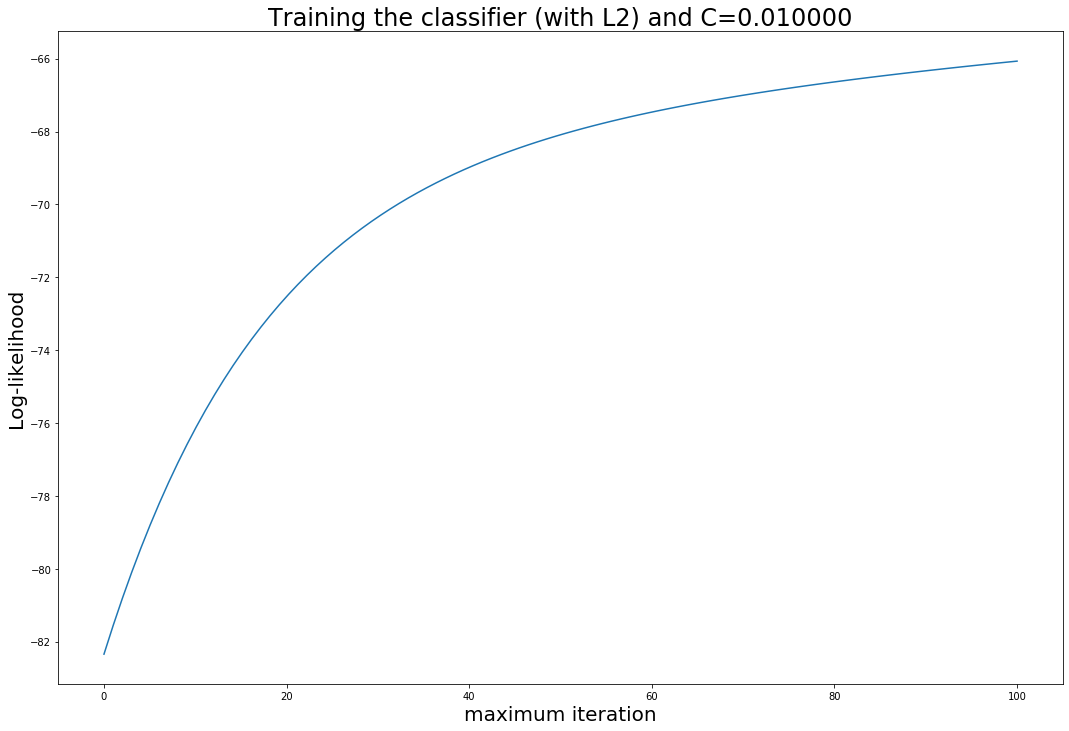

In [26]:
learning_rate = 1e-4
max_itr        = 100
l2_penalty    = 100
learned_weights = l2_logistic_regression(X_train_standard, y_train, learning_rate, max_itr, l2_penalty)

### The feature weights for C=0.01 are

In [27]:
learned_weights

array([[-0.17369298],
       [-0.17264459],
       [-0.13207678],
       [-0.16661994],
       [ 0.11742618]])

### Now, we can find the confusion matrix for train and testing data for C=0.01

In [28]:
bias      = np.ones((X_test_standard.shape[0], 1))
X_test  = np.hstack((bias, X_test_standard))
bias1      = np.ones((X_train_standard.shape[0], 1))
X_train  = np.hstack((bias1, X_train_standard))

In [29]:
train_predictions  = (predict_probability(X_train, learned_weights).flatten()>0.5)
train_predictions=train_predictions.astype('int')

In [30]:
test_predictions  = (predict_probability(X_test, learned_weights).flatten()>0.5)
test_predictions=test_predictions.astype('int')

In [31]:
train['decision']=train_predictions
train.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species,decision
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [32]:
test['decision']=test_predictions
test.head()

,Sepal.Width,Petal.Width,Sepal.Length,Petal.Length,species,decision
18,5.7,3.8,1.7,0.3,1,1
148,6.2,3.4,5.4,2.3,0,0
101,5.8,2.7,5.1,1.9,0,0
14,5.8,4.0,1.2,0.2,1,1
67,5.8,2.7,4.1,1.0,0,0


The confusion matrix for training data

In [33]:
out_counts_train = train.groupby(['species', 'decision'])['Petal.Width'].count()
out_counts_train.unstack()

decision,0,1
species,,
0,80.0,NaN
1,NaN,40.0


The confusion matrix for testing data

In [34]:
out_counts_test = test.groupby(['species', 'decision'])['Petal.Width'].count()
out_counts_test.unstack()

decision,0,1
species,,
0,20.0,NaN
1,NaN,10.0


In [35]:
print('The Logistic regression accuracy (with regularization 2) for training data is:',(out_counts_train[0][0]+out_counts_train[1][1])/sum(out_counts_train))

The Logistic regression accuracy (with regularization 2) for training data is: 1.0


In [36]:
print('The Logistic regression accuracy (with regularization 2) for testing data is:',(out_counts_test[0][0]+out_counts_test[1][1])/sum(out_counts_test))

The Logistic regression accuracy (with regularization 2) for testing data is: 1.0


# Question 2 (20 pts)
Use the iris dataset (just the binary class Iris Setosa vs others), the K-fold cross validation, metrics(accuracy, precision, recall, F1-score) and the logistic regression (Question1) with L2 regularization.
You can use scikit.
Please estimate the best parameter C(the inverse of lambda) 



### First we can plot the data

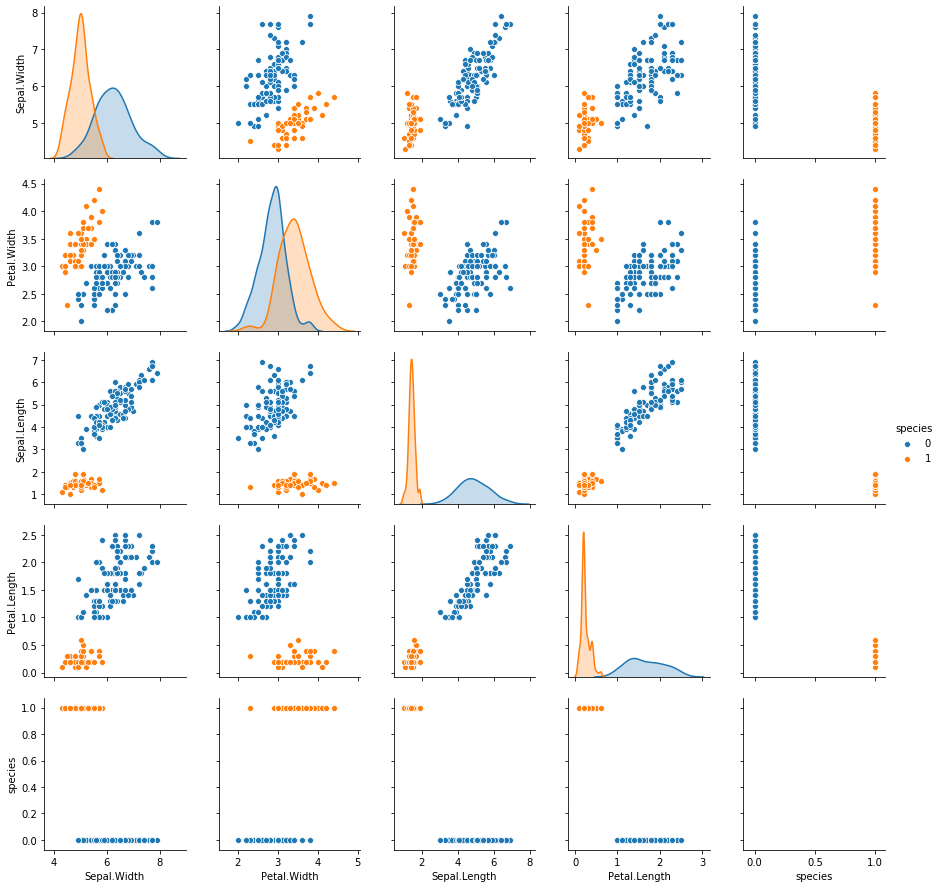

In [37]:
sns.pairplot(data=iris_df, hue='species')

### As we can see, two classes are completely separate. Now, we can use 10 fold cross validation and different scores such as accuracy, precision, recall, and f1 to find the best C for logistic regression model. First we run the model for different C and calculate the mean of accuracy, precision, recall, and f1 scores.

In [38]:
C=np.logspace(-10,10,20)
#scoring = {'accuracy' : make_scorer(accuracy_score),'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}
scoring = ['accuracy','precision', 'recall', 'f1']
Result_cv = pd.DataFrame(columns=['c', 'mean_accuracy','mean_Recall','mean_Precision','mean_F1'])
j=0
for c in C:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    model=LogisticRegression(penalty='l2', C=c, solver='liblinear',fit_intercept=True)
    Res = cross_validate(estimator=model,X=X_train_standard,y=y_train,cv=kfold,scoring=scoring)
    Result_cv.loc[j] = [c, Res['test_accuracy'].mean(),Res['test_precision'].mean(),Res['test_recall'].mean(),Res['test_f1'].mean()]
    j+=1
Result_cv


,c,mean_accuracy,mean_Recall,mean_Precision,mean_F1
0,1.000000e-10,0.975,0.38,0.4,0.388889
1,1.128838e-09,0.975,0.38,0.4,0.388889
2,1.274275e-08,0.975,0.38,0.4,0.388889
3,1.438450e-07,0.975,0.38,0.4,0.388889
4,1.623777e-06,0.975,0.38,0.4,0.388889
5,1.832981e-05,0.975,0.38,0.4,0.388889
6,2.069138e-04,0.975,0.38,0.4,0.388889
7,2.335721e-03,0.975,0.38,0.4,0.388889
8,2.636651e-02,1.000,0.40,0.4,0.400000
9,2.976351e-01,1.000,0.40,0.4,0.400000


### As it can be seen, the best C is between 2.335721e-03 and 2.636651e-02. So, we can find the best C with grid search.

In [39]:
grid={"C":np.logspace(-10,10,2000), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(fit_intercept=True)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_standard,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.0025333888274460823, 'penalty': 'l2'}
accuracy : 1.0


## The best C is 0.0025333888274460823.

### Now, we can run the logistic regression model for different C and find the mean accuracy for 10 fold cross validation. Then we can find the accuracy, precision, recall, and f1 for testing points. 

In [40]:
Result = pd.DataFrame(columns=['c', 'K-fold Cross validation','Train_accuracy','Test_accuracy','Recall','Precision','F1_score','Coefficients'])
j=0
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train_standard, y_train)
    y_train_predict = clf.predict(X_train_standard)
    y_test_predict = clf.predict(X_test_standard)
    coef=clf.coef_
    train_acc = clf.score(X_train_standard, y_train)
    test_acc = clf.score(X_test_standard, y_test)
    recall = recall_score(y_test, y_test_predict)
    precision = precision_score(y_test, y_test_predict)
    f1 = f1_score(y_test, y_test_predict)
    kfold = model_selection.KFold(n_splits=10, random_state=6)
    model = clf
    cross_val = model_selection.cross_val_score(model, X_train_standard, y_train, cv=kfold)
    Result.loc[j] = [c, cross_val.mean(),train_acc,test_acc,recall,precision,f1,coef]
    j+=1
Result

,c,K-fold Cross validation,Train_accuracy,Test_accuracy,Recall,Precision,F1_score,Coefficients
0,1.000000e-10,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-5.202219743320228e-09, -4.11904902898891e-0..."
1,1.128838e-09,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-5.8724622568465645e-08, -4.649738217593949e..."
2,1.274275e-08,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-6.629051410608465e-07, -5.248795537913433e-..."
3,1.438450e-07,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-7.483041560659432e-06, -5.9249736833772485e..."
4,1.623777e-06,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-8.446085169189901e-05, -6.687498919971664e-..."
5,1.832981e-05,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-0.0009520358071688436, -0.00075366637958649..."
6,2.069138e-04,0.975,0.983333,1.0,1.0,1.0,1.0,"[[-0.010573381345837223, -0.008354036965792492..."
7,2.335721e-03,0.975,1.000000,1.0,1.0,1.0,1.0,"[[-0.10118917979008893, -0.07829002425870113, ..."
8,2.636651e-02,1.000,1.000000,1.0,1.0,1.0,1.0,"[[-0.4834348303386875, -0.32887174534581687, -..."
9,2.976351e-01,1.000,1.000000,1.0,1.0,1.0,1.0,"[[-1.1509977585085345, -0.6254523214884339, -1..."


The idea is to choose that C which offers the smallest difference between the training and testing accuracy (remember we want to generalise our model to unseen data).

(0.5, 1.5)

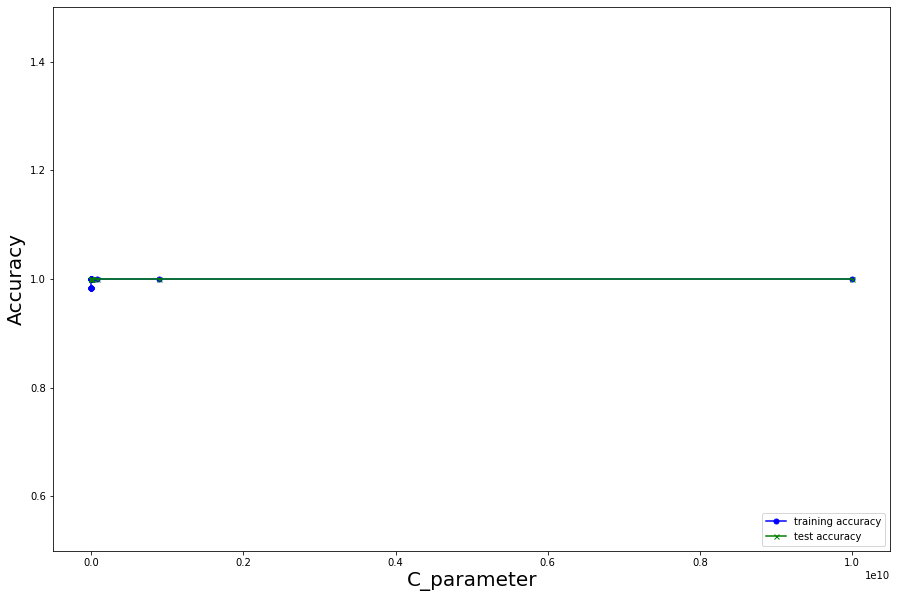

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(Result['c']
            ,Result['Train_accuracy']
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
plt.plot(Result['c']
            ,Result['Test_accuracy']
            ,color='green'
            ,marker='x'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(loc='lower right')
plt.ylim([0.5,1.5])